In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
dfcar = pd.read_csv("car-mpg.csv")

In [61]:
dfcar.shape

(398, 10)

In [62]:
import seaborn as sns

In [70]:
dfcar

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


In [64]:
dfcarbackup = dfcar.copy()

In [69]:
dfcarbackup

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [71]:
dfcar[dfcarbackup['car_type']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,187.0,17.219251,4.141873,9.0,14.0,17.0,19.2,38.0
cyl,187.0,7.101604,0.997496,6.0,6.0,8.0,8.0,8.0
disp,187.0,288.021390,75.292259,145.0,231.0,302.0,350.0,455.0
wt,187.0,3703.032086,607.195527,2472.0,3216.0,3651.0,4199.5,5140.0
acc,187.0,14.441176,2.694212,8.0,12.5,14.3,16.1,22.2


In [72]:
dfcar[dfcarbackup['car_type']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,211.0,29.093839,5.807492,18.0,25.00,28.0,32.95,46.6
cyl,211.0,3.995261,0.182512,3.0,4.00,4.0,4.00,5.0
disp,211.0,109.590047,22.414577,68.0,91.00,105.0,121.50,183.0
wt,211.0,2321.146919,357.333754,1613.0,2050.50,2246.0,2578.50,3530.0
acc,211.0,16.566825,2.411330,11.6,14.75,16.2,18.00,24.8


In [68]:
#Lets drop below fields are they have any relationship with clustering...
dfcar.drop("car_name", axis=1, inplace=True)
dfcar.drop("yr", axis=1, inplace=True)
dfcar.drop("origin", axis=1, inplace=True)
target = dfcar['car_type']
dfcar.drop("car_type", axis=1, inplace=True)

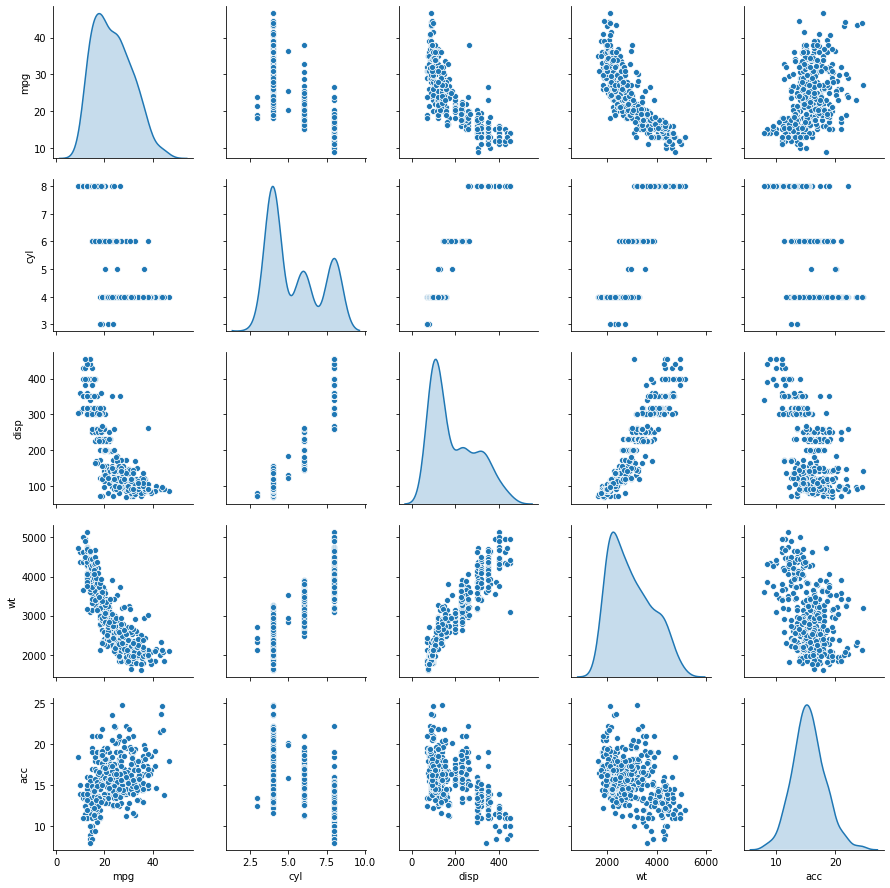

In [43]:
sns.pairplot(dfcar, diag_kind='kde')

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [171]:
error = []
silhouette_sc = []
cluster_num = []

In [82]:
#Lets standardise data
sc = StandardScaler()

In [165]:
dfcar_normal = sc.fit_transform(dfcar)

In [173]:
for cluster_count in range(2,5) :
    model = KMeans(n_clusters=cluster_count)
    model.fit(dfcar_normal)
    error.append(model.inertia_)
    silhouette_sc.append(silhouette_score(dfcar_normal, model.fit_predict(dfcar_normal)))
    cluster_num.append(cluster_count)

In [174]:
error

[943.5277338423368, 608.3395823563409, 491.33933554433327]

In [175]:
silhouette_sc

[0.5461663706659118, 0.44056990602150614, 0.37997016858077604]

In [176]:
cluster_num

[2, 3, 4]

In [177]:
dfassess = pd.DataFrame({"ClusterCount": cluster_num, "SilhouetteScore" : silhouette_sc, "Inertia" : error})

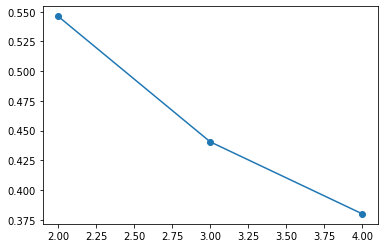

In [183]:
plt.plot(figsize=(12,6))
plt.plot(dfassess.ClusterCount,dfassess.SilhouetteScore, marker='o')

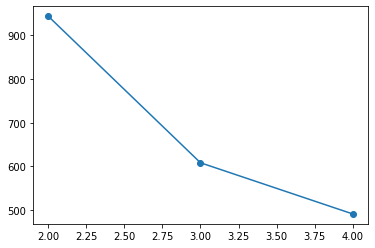

In [184]:
plt.plot(figsize=(12,6))
plt.plot(dfassess.ClusterCount,dfassess.Inertia, marker='o')

In [185]:
model = KMeans(n_clusters=2)
model.fit(dfcar_normal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [186]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [189]:
sc.inverse_transform(model.cluster_centers_)

array([[  26.55      ,    4.56802721,  140.19897959,   84.77716135,
        2567.95238095,   16.51496599],
       [  14.93365385,    7.96153846,  343.89423077,  158.65384615,
        4108.18269231,   12.89134615]])

In [194]:
model.fit_transform(dfcar_normal)

array([[3.62683961, 1.20651243],
       [4.450368  , 0.72641156],
       [4.02015597, 1.17087372],
       [3.87531653, 0.97931206],
       [3.99092076, 1.35320907],
       [5.71835182, 1.70375407],
       [6.33470189, 2.40449823],
       [6.26473797, 2.37346944],
       [6.29590026, 2.32366653],
       [5.50873862, 1.87148619],
       [4.8623212 , 1.32174283],
       [5.02806271, 1.87610633],
       [4.88611066, 1.42359398],
       [5.93233201, 2.59224939],
       [0.84514686, 4.38948204],
       [1.28981165, 3.17027369],
       [1.58935937, 3.06641049],
       [1.25746701, 3.47234967],
       [1.04768155, 4.76088342],
       [2.03947574, 6.04848351],
       [0.61784285, 4.61867742],
       [0.94898946, 4.41089114],
       [0.72341152, 4.70865974],
       [1.7248958 , 4.28735252],
       [1.36561979, 3.26439101],
       [5.59422097, 1.76398821],
       [5.00741044, 1.54224858],
       [5.24060378, 1.506359  ],
       [5.16416075, 2.49418628],
       [1.04768155, 4.76088342],
       [0.